# Day 13: An Example of Markov Chain Monte Carlo Sampling

We will be looking at a specific version of MCMC sampling called gibbs sampling for a 2D multivariate normal.  This will be covered in detail in a few lectures, but the goal for now it get a sense of what it means to sample from a Markov Chain.


# Some helper code

In [1]:
##Imports
import numpy as np
import pandas as pd
import scipy.stats

np.set_printoptions(precision=3, suppress=True)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

np.random.seed( 12 )

In [2]:
##Gibbs sampling helper functions

def draw_z0_given_z1(z1):
    ''' Sample a value of z[0] from its conditional given z[1] 
    
    Args
    ----
    z1 : float
        Value of random variable z[1]
    random_state : numpy RandomState object
        Random number generator
    
    Returns
    -------
    z0_samp : float
        Sample from the conditional p(z[0] | z[1])
    '''
    ## First, use Bishop textbook formulas to compute the conditional mean/var
    mean_01 = 0.4 * z1
    var_01 = 0.68
    
    # Draw a value u from the Standard Normal (zero mean, unit variance)
    u_samp = np.random.randn()
    
    # Transform this value into a sample from Normal(mean_01, var_01)
    # Remember, if u ~ Normal(0, 1), a "standard" normal with mean 0 variance 1,
    # then using transform: x <- T(u), with T(u) = \mu + \sigma * u
    # we can say x ~ Normal(\mu, \sigma^2)
    z0_samp = mean_01 + np.sqrt(var_01) * u_samp
    return z0_samp

def draw_z1_given_z0(z0):
    ''' Sample a value of z[1] from its conditional given z[0] 
    
    Args
    ----
    z0 : float
        Value of random variable z[0]
    random_state : numpy RandomState object
        Random number generator
    
    Returns
    -------
    z1_samp : float
        Sample from the conditional p(z[1] | z[0])
    '''
    ## First, use Bishop textbook formulas to compute conditional mean/var
    mean_10 = 0.8 * z0
    var_10 = 1.36
    
    # Draw a value u from the Standard Normal (zero mean, unit variance)
    u_samp = np.random.randn()
    
    # Transform this value into a sample from Normal(mean_01, var_01)
    # Remember, if u ~ Normal(0, 1), a "standard" normal with mean 0 variance 1,
    # then using transform: x <- T(u), with T(u) = \mu + \sigma * u
    # we can say x ~ Normal(\mu, \sigma^2)
    z1_samp = mean_10 + np.sqrt(var_10) * u_samp
    return z1_samp

In [3]:
##Using gibbs sampling
def draw_sample_from_mcmc( prev_sample ):
    new_sample = np.zeros( 2 )
    new_sample[ 0 ] = draw_z0_given_z1(prev_sample[1])
    new_sample[ 1 ] = draw_z1_given_z0(prev_sample[0])
    return new_sample
    
##Using numpy's built in MVN
def draw_sample_from_mvn():
    true_mu_2 = np.zeros(2)
    true_cov_22 = np.asarray([[1.0, 0.8], [0.8, 2.0]])
    true_sample_SD = np.random.multivariate_normal(true_mu_2, true_cov_22 )
    
    return true_sample_SD

In [4]:
def plot_samples_from_mcmc_and_numpy_mvn( z_samples_SD , true_samples_SD ):

    true_density = []
    for i in range( 1000 ):
        true_density.append( draw_sample_from_mvn() )
    true_density = np.array( true_density )
    
    z_samples_SD = np.array( z_samples_SD )
    true_samples_SD = np.array( true_samples_SD )
    
    fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,4))

    ax_grid[0].plot(z_samples_SD[0,0], z_samples_SD[0,1], 'rx' )
    ax_grid[0].legend( 'Start state' )
    ax_grid[0].plot(z_samples_SD[:,0], z_samples_SD[:,1], 'k' )
    ax_grid[0].set_title('MCMC sampler')
    ax_grid[0].set_aspect('equal', 'box');
    ax_grid[0].set_xlabel('$z_0$');
    ax_grid[0].set_ylabel('$z_1$');

    ax_grid[1].plot(true_samples_SD[:,0], true_samples_SD[:,1], 'k.')
    ax_grid[1].set_title('np.random.multivariate_normal')
    ax_grid[1].set_aspect('equal', 'box');
    #ax_grid[1].set_xlim([-6, 6]);
    #ax_grid[1].set_ylim([-6, 6]);
    ax_grid[1].set_xlabel('$z_0$');
    ax_grid[1].set_ylabel('$z_1$');

# Exercise: Compare results of your MCMC-sampler and Numpy's built-in sampler side-by-side

## Task 1: implement a for loop to draw S total samples from both an MCMC method for sampling, and numpy's built in sampler for an MVN and visualize the results.

You have been given functions that draw 1 sample from each of these methods, and an example of how to do so.  Be careful to pass in the correct input to the function that draws an mcmc sample!  It should always be the previously drawn MCMC sample.  

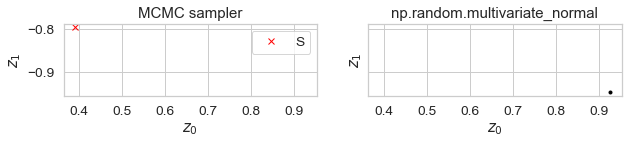

In [5]:
S = 100

mcmc_sample = np.zeros( 2 ) ##Start state for mcmc
##Draw 1 mcmc sample
mcmc_sample = draw_sample_from_mcmc( mcmc_sample )

##Draw 1 sample from numpy's MVN
mvn_sample = draw_sample_from_mvn()

mcmc_samples = [ mcmc_sample ]
mvn_samples = [ mvn_sample ]

##TODO: sample S-1 more samples from each method and add them to the arrays of samples

plot_samples_from_mcmc_and_numpy_mvn( mcmc_samples , mvn_samples )


## Task 2: Discuss the 2 methods.  Do both sets of samples that look similar?  Does MCMC work?  

Note: You can treat the samples drawn from the numpy function as ground truth.

## Task 3: Now draw only 5 samples and start the mcmc chain in a "bad" state at [-10, 10].  Then draw 5 samples again, but this time start the mcmc chain in a "better" state at [ 0, 0].

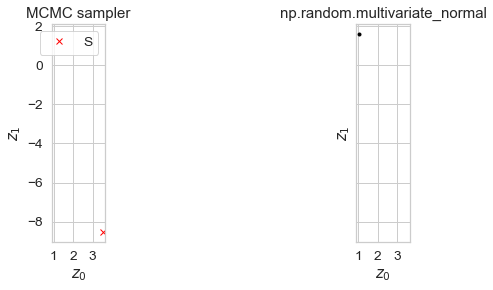

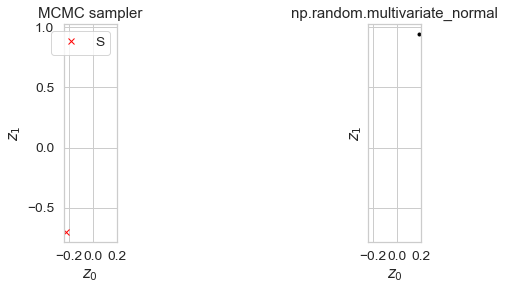

In [6]:
S = 5

##Bad mcmc start state example

mcmc_sample = [ -10 , 10 ] ##Bad start state for mcmc
##Draw 1 mcmc sample
mcmc_sample = draw_sample_from_mcmc( mcmc_sample )

##Draw 1 sample from numpy's MVN
mvn_sample = draw_sample_from_mvn()

mcmc_samples = [ mcmc_sample ]
mvn_samples = [ mvn_sample ]

##TODO: sample S-1 more samples from each method and add them to the arrays of samples
##You can use the same for loop as above.

plot_samples_from_mcmc_and_numpy_mvn( mcmc_samples , mvn_samples )


############################################################################################################


##Good mcmc start state example

mcmc_sample = [ 0 , 0 ] ##Good start state for mcmc
##Draw 1 mcmc sample
mcmc_sample = draw_sample_from_mcmc( mcmc_sample )

##Draw 1 sample from numpy's MVN
mvn_sample = draw_sample_from_mvn()

mcmc_samples = [ mcmc_sample ]
mvn_samples = [ mvn_sample ]

##TODO: sample S-1 more samples from each method and add them to the arrays of samples
##You can use the same for loop as above.


plot_samples_from_mcmc_and_numpy_mvn( mcmc_samples , mvn_samples )

## Task 4: Discuss--did the "bad" start state affect the MCMC sampler in a different way than the "good" start state?  Is there any analogue for the numpy function?

Note: you can use the numpy samples from task 1 as ground truth for what true samples from the distribution should look like.

Note: Make sure to look at the x and y axes of the graph